https://www.mk-mode.com/rails/loto/numbers4#google_vignette

matplotlibで日本語を表示する方法  
https://qiita.com/fwzis/items/c4cfee25d2266d10ad4b

       1    7    0    5    3    2    9    4    6    8
千の位  635  665  667  641  666  683  660  660  695  680
百の位  676  678  669  701  699  577  711  636  642  663
十の位  658  662  717  661  665  600  721  658  630  680
一の位  688  644  663  674  640  669  719  653  642  660


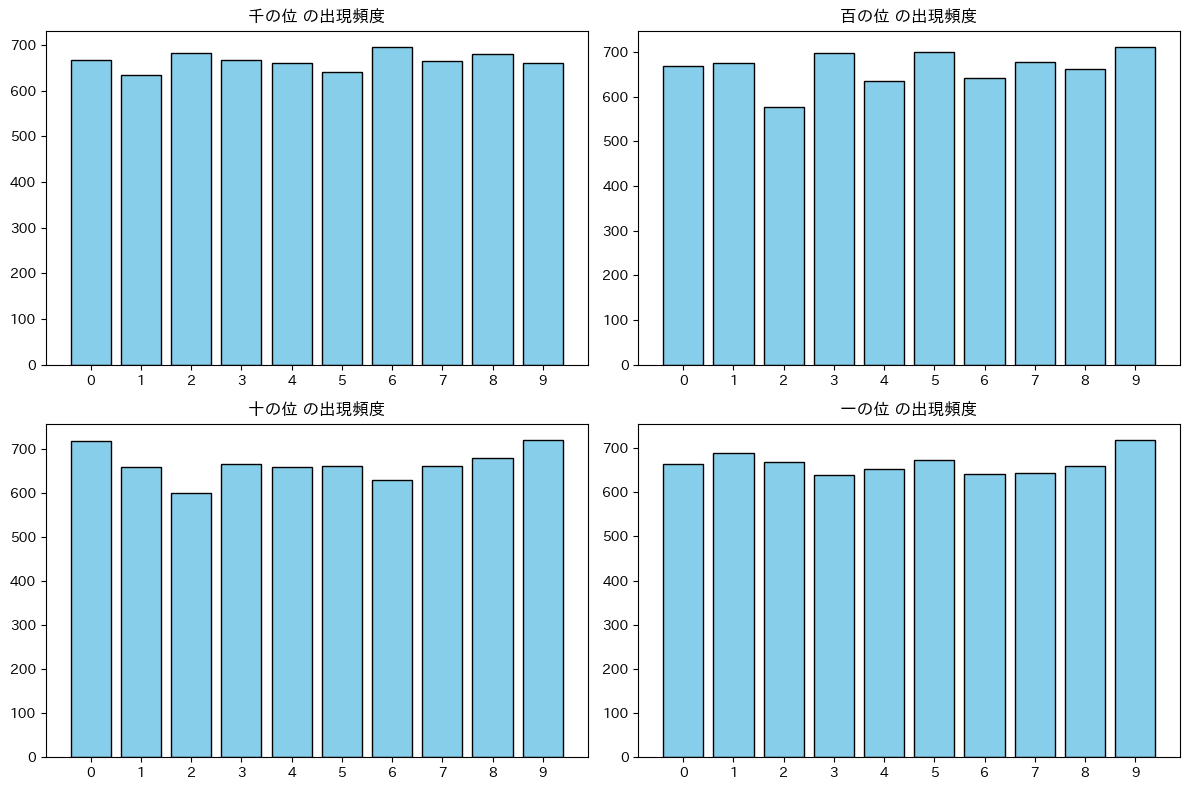

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

# CSVファイルからデータを読み込む（ファイル名は適宜変更）
file_path = "./data/NUMBERS4_ALL.csv"
df = pd.read_csv(file_path)

# 「当選数字」列を文字列型に変換
df["当選数字"] = df["当選数字"].astype(str)

# 3桁の数字を持つ行を修正（先頭に0をつけて4桁にする）
df["当選数字"] = df["当選数字"].apply(lambda x: x.zfill(4) if len(x) < 4 else x)

# 各桁ごとにリストを作成
sen_no_keta = [int(num[0]) for num in df["当選数字"]]  # 千の位
hyaku_no_keta = [int(num[1]) for num in df["当選数字"]]  # 百の位
ju_no_keta = [int(num[2]) for num in df["当選数字"]]  # 十の位
ichi_no_keta = [int(num[3]) for num in df["当選数字"]]  # 一の位

# 各桁の出現頻度をカウント
sen_count = Counter(sen_no_keta)
hyaku_count = Counter(hyaku_no_keta)
ju_count = Counter(ju_no_keta)
ichi_count = Counter(ichi_no_keta)

# 結果をデータフレームにまとめる
df_freq = pd.DataFrame([sen_count, hyaku_count, ju_count, ichi_count])
df_freq.index = ["千の位", "百の位", "十の位", "一の位"]
df_freq = df_freq.fillna(0).astype(int)  # 欠損値を0にし、整数型に変換

# 結果を表示
print(df_freq)

# グラフ描画
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

positions = ["千の位", "百の位", "十の位", "一の位"]
counts = [sen_count, hyaku_count, ju_count, ichi_count]

for ax, count, pos in zip(axes.flatten(), counts, positions):
    ax.bar(range(10), [count.get(i, 0) for i in range(10)], color='skyblue', edgecolor='black')
    ax.set_title(f"{pos} の出現頻度")
    ax.set_xticks(range(10))

plt.tight_layout()
plt.show()
